In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [25]:
kospi = pd.read_csv('kospi_data.csv')
dow = pd.read_csv('dowjones_data.csv')

In [27]:
kospi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,2474.860107,2481.020020,2465.939941,2479.649902,2479.649902,262200
1,2018-01-03,2484.629883,2493.399902,2481.909912,2486.350098,2486.350098,331100
2,2018-01-04,2502.500000,2502.500000,2466.449951,2466.459961,2466.459961,333800
3,2018-01-05,2476.850098,2497.520020,2475.510010,2497.520020,2497.520020,308800
4,2018-01-08,2510.699951,2515.370117,2494.179932,2513.280029,2513.280029,311400


In [8]:
dow.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000
1,2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000
2,2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000
3,2018-01-05,25114.919922,25299.789063,25112.009766,25295.869141,25295.869141,358020000
4,2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000


In [28]:
kospi.info(), dow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
Date         244 non-null object
Open         244 non-null float64
High         244 non-null float64
Low          244 non-null float64
Close        244 non-null float64
Adj Close    244 non-null float64
Volume       244 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Date         250 non-null object
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Adj Close    250 non-null float64
Volume       250 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


(None, None)

In [12]:
pd.to_datetime(kospi['Date']),pd.to_datetime(dow['Date'])

(0     2018-01-02
 1     2018-01-03
 2     2018-01-04
 3     2018-01-05
 4     2018-01-08
 5     2018-01-09
 6     2018-01-10
 7     2018-01-11
 8     2018-01-12
 9     2018-01-15
 10    2018-01-16
 11    2018-01-17
 12    2018-01-18
 13    2018-01-19
 14    2018-01-22
 15    2018-01-23
 16    2018-01-24
 17    2018-01-25
 18    2018-01-26
 19    2018-01-29
 20    2018-01-30
 21    2018-01-31
 22    2018-02-01
 23    2018-02-02
 24    2018-02-05
 25    2018-02-06
 26    2018-02-07
 27    2018-02-08
 28    2018-02-09
 29    2018-02-12
          ...    
 214   2018-11-16
 215   2018-11-19
 216   2018-11-20
 217   2018-11-21
 218   2018-11-22
 219   2018-11-23
 220   2018-11-26
 221   2018-11-27
 222   2018-11-28
 223   2018-11-29
 224   2018-11-30
 225   2018-12-03
 226   2018-12-04
 227   2018-12-05
 228   2018-12-06
 229   2018-12-07
 230   2018-12-10
 231   2018-12-11
 232   2018-12-12
 233   2018-12-13
 234   2018-12-14
 235   2018-12-17
 236   2018-12-18
 237   2018-12-19
 238   201

In [31]:
 kospi = kospi.set_index('Date')

In [32]:
dow = dow.set_index('Date')

In [33]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2474.860107,2481.020020,2465.939941,2479.649902,2479.649902,262200
2018-01-03,2484.629883,2493.399902,2481.909912,2486.350098,2486.350098,331100
2018-01-04,2502.500000,2502.500000,2466.449951,2466.459961,2466.459961,333800
2018-01-05,2476.850098,2497.520020,2475.510010,2497.520020,2497.520020,308800
2018-01-08,2510.699951,2515.370117,2494.179932,2513.280029,2513.280029,311400


In [34]:
kospi.isna().sum(), dow.isna().sum()

(Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64, Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64)

In [35]:
len(kospi), len(dow)

(244, 250)

In [36]:
df = pd.concat((kospi,dow), axis=1).dropna()

C:\Users\wtime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [37]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
2018-01-02,2474.860107,2481.020020,2465.939941,2479.649902,2479.649902,262200.0,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000.0
2018-01-03,2484.629883,2493.399902,2481.909912,2486.350098,2486.350098,331100.0,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0
2018-01-04,2502.500000,2502.500000,2466.449951,2466.459961,2466.459961,333800.0,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0
2018-01-05,2476.850098,2497.520020,2475.510010,2497.520020,2497.520020,308800.0,25114.919922,25299.789063,25112.009766,25295.869141,25295.869141,358020000.0
2018-01-08,2510.699951,2515.370117,2494.179932,2513.280029,2513.280029,311400.0,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0


In [40]:
df_index = ['k_Open', 'k_High', 'k_Low', 'k_Close', 'k_Adj Close', 'k_Volume', 'd_Open', 'd_High',
       'd_Low', 'd_Close', 'd_Adj Close', 'd_Volume']
df.columns = df_index

In [41]:
df.head()

,k_Open,k_High,k_Low,k_Close,k_Adj Close,k_Volume,d_Open,d_High,d_Low,d_Close,d_Adj Close,d_Volume
2018-01-02,2474.860107,2481.020020,2465.939941,2479.649902,2479.649902,262200.0,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000.0
2018-01-03,2484.629883,2493.399902,2481.909912,2486.350098,2486.350098,331100.0,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0
2018-01-04,2502.500000,2502.500000,2466.449951,2466.459961,2466.459961,333800.0,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0
2018-01-05,2476.850098,2497.520020,2475.510010,2497.520020,2497.520020,308800.0,25114.919922,25299.789063,25112.009766,25295.869141,25295.869141,358020000.0
2018-01-08,2510.699951,2515.370117,2494.179932,2513.280029,2513.280029,311400.0,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0


In [44]:
len(df), df.isna().sum()

(236, k_Open         0
 k_High         0
 k_Low          0
 k_Close        0
 k_Adj Close    0
 k_Volume       0
 d_Open         0
 d_High         0
 d_Low          0
 d_Close        0
 d_Adj Close    0
 d_Volume       0
 dtype: int64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D00B1FCC0>,
      dtype=object)

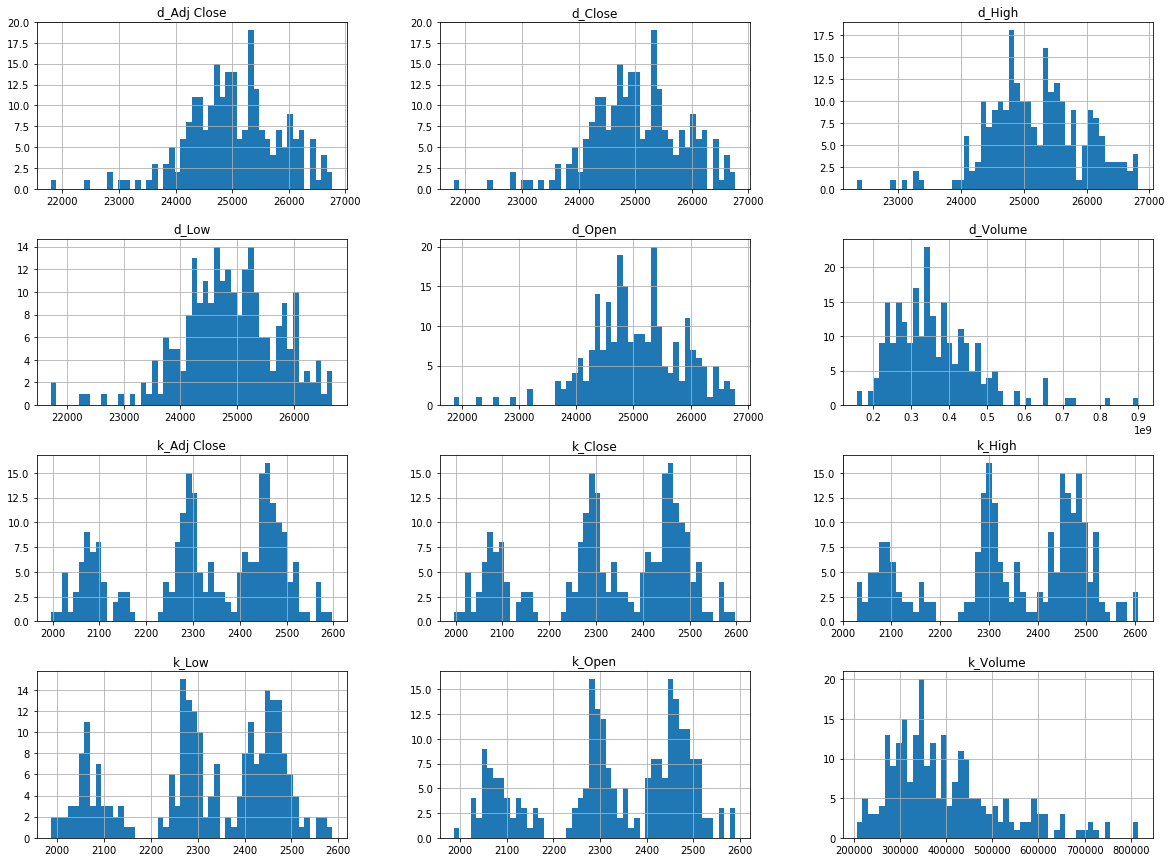

In [45]:
df.hist(bins=50, figsize=(20,15))

In [49]:
input_seq = 30
output_seq = 10
m = len(df) - (input_seq + output_seq) +1
len(df), m

(236, 197)

In [50]:
x_list = []
y_list = []
for i in range(m):
    x = df.iloc[i:i+input_seq]
    y = df.iloc[i+input_seq:i + input_seq+output_seq][['k_Close','d_Close']]
    x_list.append(x)
    y_list.append(y)


In [67]:
len(x_list)

197

In [72]:
y_list

[                k_Close       d_Close
 2018-02-14  2421.830078  24893.490234
 2018-02-20  2415.120117  24964.750000
 2018-02-21  2429.649902  24797.779297
 2018-02-22  2414.280029  24962.480469
 2018-02-23  2451.520020  25309.990234
 2018-02-26  2457.649902  25709.269531
 2018-02-27  2456.139893  25410.029297
 2018-02-28  2427.360107  25029.199219
 2018-03-02  2402.159912  24538.060547
 2018-03-05  2375.060059  24874.759766,                 k_Close       d_Close
 2018-02-20  2415.120117  24964.750000
 2018-02-21  2429.649902  24797.779297
 2018-02-22  2414.280029  24962.480469
 2018-02-23  2451.520020  25309.990234
 2018-02-26  2457.649902  25709.269531
 2018-02-27  2456.139893  25410.029297
 2018-02-28  2427.360107  25029.199219
 2018-03-02  2402.159912  24538.060547
 2018-03-05  2375.060059  24874.759766
 2018-03-06  2411.409912  24884.119141,                 k_Close       d_Close
 2018-02-21  2429.649902  24797.779297
 2018-02-22  2414.280029  24962.480469
 2018-02-23  2451.520020 

In [53]:
x_3d = np.stack(x_list, axis=0)
y_3d = np.stack(y_list, axis=0)
m =len(x_3d)
x_2d = np.reshape(x_3d,[m,-1])
y_2d = np.reshape(y_3d, [m,-1])

x_3d.shape, y_3d.shape

((197, 30, 12), (197, 10, 2))

array([[[2.47486011e+03, 2.48102002e+03, 2.46593994e+03, ...,
         2.48240098e+04, 2.48240098e+04, 3.41130000e+08],
        [2.48462988e+03, 2.49339990e+03, 2.48190991e+03, ...,
         2.49226797e+04, 2.49226797e+04, 4.56790000e+08],
        [2.50250000e+03, 2.50250000e+03, 2.46644995e+03, ...,
         2.50751309e+04, 2.50751309e+04, 4.03280000e+08],
        ...,
        [2.34672998e+03, 2.37289990e+03, 2.34672998e+03, ...,
         2.41909004e+04, 2.41909004e+04, 7.35030000e+08],
        [2.38048999e+03, 2.39789990e+03, 2.36731006e+03, ...,
         2.46012695e+04, 2.46012695e+04, 4.96610000e+08],
        [2.40288989e+03, 2.42180005e+03, 2.38854004e+03, ...,
         2.46404492e+04, 2.46404492e+04, 3.74410000e+08]],

       [[2.48462988e+03, 2.49339990e+03, 2.48190991e+03, ...,
         2.49226797e+04, 2.49226797e+04, 4.56790000e+08],
        [2.50250000e+03, 2.50250000e+03, 2.46644995e+03, ...,
         2.50751309e+04, 2.50751309e+04, 4.03280000e+08],
        [2.47685010e+03, 

In [54]:
test_ratio = 0.1#10%만 테스트
test_m = int(len(x_3d)*test_ratio)
test_m

19

In [55]:
x_test = x_2d[:test_m]
x_train = x_2d[test_m:]
y_test = y_2d[:test_m]
y_train = y_2d[test_m:]

In [56]:
from sklearn.linear_model import Ridge
model = Ridge(normalize=True, solver='lsqr').fit(x_train, y_train)

In [57]:
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8166429808651536, -3.250877896781471)

In [58]:
recent = df.iloc[-input_seq:]
recent.shape
recent = np.reshape(np.array(recent), [1,-1])
recent.shape

(1, 360)

In [59]:
p = model.predict(recent)#미래예측
p = np.reshape(p,[output_seq, -1])
p.shape, p

((10, 2), array([[ 2074.22735458, 23662.91677034],
        [ 2098.06224755, 23865.2530311 ],
        [ 2108.57640249, 24053.86397017],
        [ 2114.92916581, 24088.00577585],
        [ 2117.91047428, 24118.48570808],
        [ 2126.90567405, 24058.67205546],
        [ 2127.30216898, 23973.94271631],
        [ 2136.09597019, 24082.4711472 ],
        [ 2151.23161194, 24040.52890051],
        [ 2174.15848113, 23971.28371002]]))

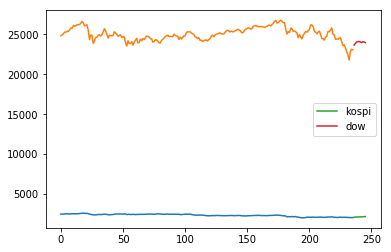

In [61]:
xm = len(df)
plt.plot(np.arange(xm), df['k_Close'].values)
plt.plot(np.arange(xm),df['d_Close'].values)
plt.plot(np.arange(xm, xm+output_seq),p[:,0], label = 'kospi')
plt.plot(np.arange(xm, xm+output_seq),p[:,1], label = 'dow')
plt.legend()

30일치로 미래 10일 예측